In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

''''''
df_ht = pd.read_csv('hotel_bookings.csv')
''''''
df_ht_lr = df_ht.drop(['company','agent','reservation_status','reservation_status_date','country'
                       ,'arrival_date_day_of_month'
                       ,'arrival_date_week_number',
                       'previous_bookings_not_canceled'], axis = 1)


''''''
df_ht_lr = df_ht_lr.dropna()


''''''
df_ht_lr.info()
# df_ht_lr.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119386 non-null  object 
 1   is_canceled                  119386 non-null  int64  
 2   lead_time                    119386 non-null  int64  
 3   arrival_date_year            119386 non-null  int64  
 4   arrival_date_month           119386 non-null  object 
 5   stays_in_weekend_nights      119386 non-null  int64  
 6   stays_in_week_nights         119386 non-null  int64  
 7   adults                       119386 non-null  int64  
 8   children                     119386 non-null  float64
 9   babies                       119386 non-null  int64  
 10  meal                         119386 non-null  object 
 11  market_segment               119386 non-null  object 
 12  distribution_channel         119386 non-null  object 
 13 

In [40]:
df_ht_lr.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,0,1,1,0.0,0,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,0,2,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [41]:
df_ht_lr = df_ht_lr.dropna()

df_ht_lr.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [42]:

df_ht_lr = df_ht_lr[df_ht_lr['is_canceled'] == 0]

<AxesSubplot:ylabel='adr_1'>

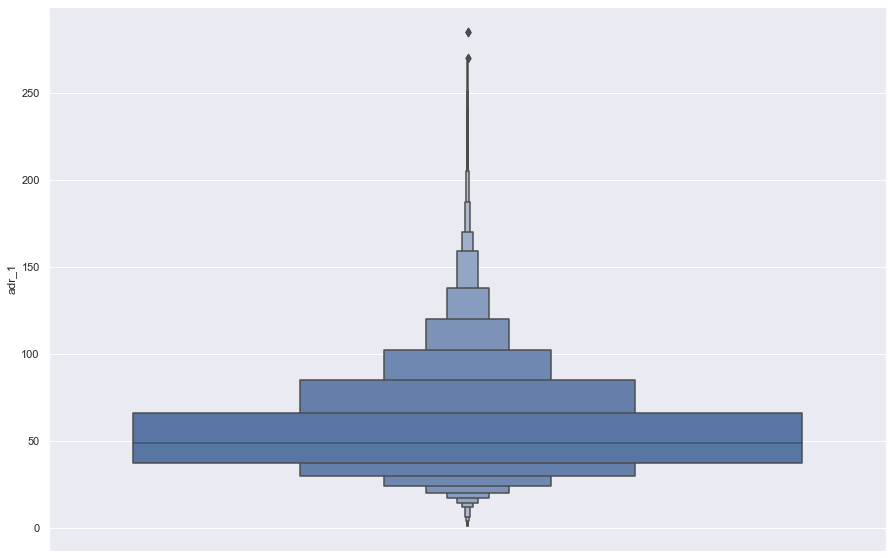

In [43]:
#1
df_ht_lrp = df_ht_lr[df_ht_lr['adults'] < 5]

#+ 2 수행을 위한 총 인원변수 추가
    #+ 10인 이상의 이상값 제거
df_ht_lrp['total_guests'] = df_ht_lr['adults'] + df_ht_lr['babies'] + df_ht_lr['children']
df_ht_lrp = df_ht_lrp[df_ht_lrp['total_guests'] < 10]
#2
df_ht_lrp['adr_1'] = df_ht_lrp['adr'] // df_ht_lrp['total_guests']

    #2+
df_ht_lrp = df_ht_lrp.replace([np.inf, -np.inf], np.nan)
df_ht_lrp = df_ht_lrp.dropna()


#3 adr_1 이 0보다 작거나 같은 경우, 무의미한 데이터로 간주하여 삭제한다. & 400이상인 경우 이상치로 간주하여 제거
df_ht_lrp = df_ht_lrp[df_ht_lrp['adr_1'] > 0]
df_ht_lrp = df_ht_lrp[df_ht_lrp['adr_1'] < 400]

sns.boxenplot(data=df_ht_lrp, y='adr_1')

In [44]:
df_ht_lrp_mid = df_ht_lrp.drop(['previous_cancellations','reserved_room_type','days_in_waiting_list',
                                'is_canceled',
                                'adr'],
                               axis=1)

df_ht_lrp_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73378 entries, 2 to 119389
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        73378 non-null  object 
 1   lead_time                    73378 non-null  int64  
 2   arrival_date_year            73378 non-null  int64  
 3   arrival_date_month           73378 non-null  object 
 4   stays_in_weekend_nights      73378 non-null  int64  
 5   stays_in_week_nights         73378 non-null  int64  
 6   adults                       73378 non-null  int64  
 7   children                     73378 non-null  float64
 8   babies                       73378 non-null  int64  
 9   meal                         73378 non-null  object 
 10  market_segment               73378 non-null  object 
 11  distribution_channel         73378 non-null  object 
 12  is_repeated_guest            73378 non-null  int64  
 13  assigned_room_t

Text(0.5, 1.0, 'Heatmap')

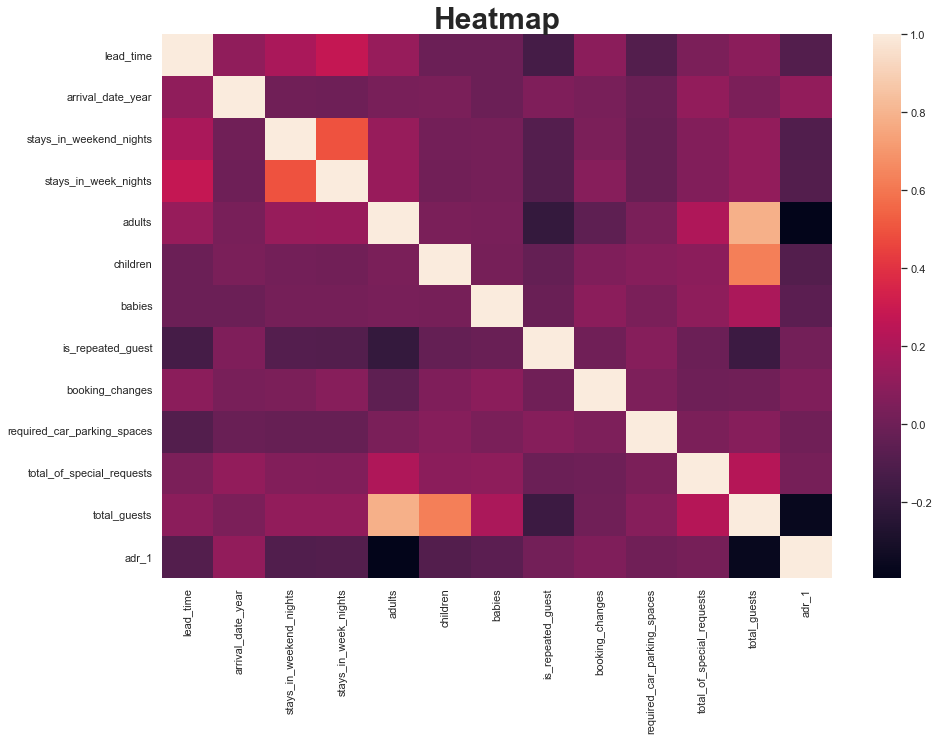

In [45]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(df_ht_lrp_mid.corr())
plt.title('Heatmap',fontsize=30,fontweight='bold')

In [46]:
# df_ht_lrp_fin = df_ht_lrp_mid.drop('country',axis=1)

# 더미화
df_lrp_fin = pd.get_dummies(data=df_ht_lrp_mid, 
                            columns=
                            ['hotel',
                             'arrival_date_year',
                             'arrival_date_month',
                            #  'arrival_date_week_number',
                            #  'arrival_date_day_of_month',
                             'meal',
                             'market_segment',
                             'distribution_channel',
                             'is_repeated_guest',
                            #  'previous_bookings_not_canceled',
                             'assigned_room_type',
                             'booking_changes',
                             'deposit_type',
                             'customer_type',
                             'required_car_parking_spaces',
                             
                             ]
                            ,drop_first=True)

df_lrp_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73378 entries, 2 to 119389
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       73378 non-null  int64  
 1   stays_in_weekend_nights         73378 non-null  int64  
 2   stays_in_week_nights            73378 non-null  int64  
 3   adults                          73378 non-null  int64  
 4   children                        73378 non-null  float64
 5   babies                          73378 non-null  int64  
 6   total_of_special_requests       73378 non-null  int64  
 7   total_guests                    73378 non-null  float64
 8   adr_1                           73378 non-null  float64
 9   hotel_Resort Hotel              73378 non-null  uint8  
 10  arrival_date_year_2016          73378 non-null  uint8  
 11  arrival_date_year_2017          73378 non-null  uint8  
 12  arrival_date_month_August      

In [47]:
from sklearn.model_selection import train_test_split
X = df_lrp_fin.drop('adr_1',axis=1)
y = df_lrp_fin['adr_1']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [49]:
# print the intercept
print(lm.intercept_)

111.39078182929096


In [62]:
# lm.coef_
# X.columns
coeff_df = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False).head(10))
print(coeff_df.sort_values(by='Coefficient', ascending=True).head(10))
# coeff_df.sort_values(by='Coefficient', ascending=True).head(40)

                              Coefficient
distribution_channel_GDS        38.409379
assigned_room_type_H            32.430561
assigned_room_type_G            27.531394
meal_FB                         27.207162
arrival_date_month_August       23.185364
meal_Undefined                  22.792139
arrival_date_month_July         18.982442
assigned_room_type_F            17.409187
arrival_date_month_September    17.121895
arrival_date_year_2017          17.063607
                              Coefficient
market_segment_Complementary   -44.293163
market_segment_Corporate       -20.304021
arrival_date_month_January     -18.307701
market_segment_Groups          -17.705920
hotel_Resort Hotel             -17.567957
market_segment_Offline TA/TO   -17.529877
total_guests                   -16.661723
arrival_date_month_February    -14.077050
adults                         -12.800650
booking_changes_14             -12.798003


In [51]:
# predict

predictions = lm.predict(X_test)

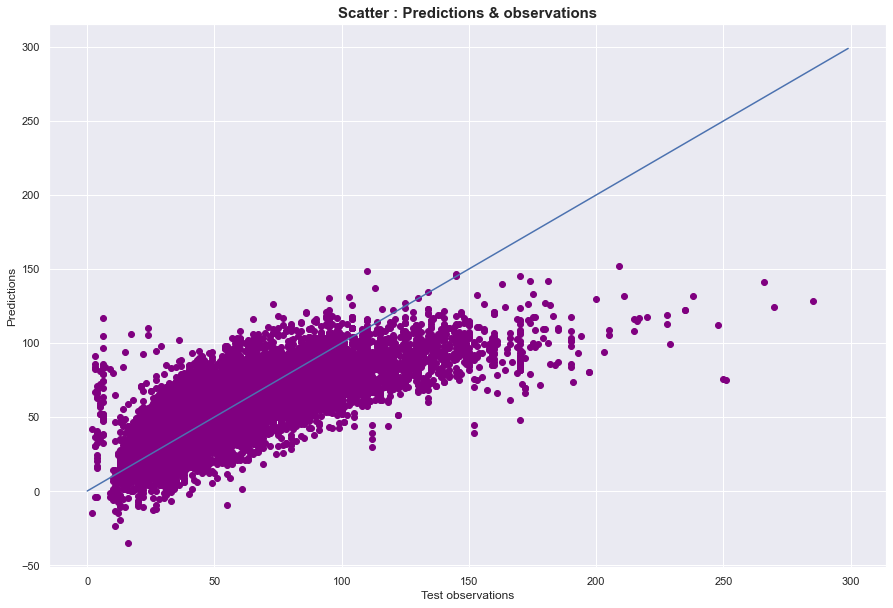

In [52]:
plt.scatter(x=y_test,y=predictions, c='purple')


plt.plot(range(300), range(300))
plt.title('Scatter : Predictions & observations',fontsize=15,fontweight='bold')
plt.xlabel('Test observations')
plt.ylabel('Predictions')
plt.show()

plt.show()


## compare the actual price with the predicted one in the test set

In [53]:
## compare the actual price with the predicted one in the test set

y_test1=y_test.to_frame()
y_test1['Predictions']=predictions
y_test1.head()

,adr_1,Predictions
3074,39.0,40.375931
22670,26.0,33.187748
111929,153.0,98.002492
31075,15.0,30.385253
105105,97.0,64.624999


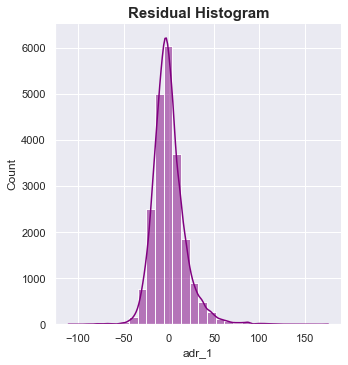

In [54]:
sns.displot((y_test-predictions),bins=30,color='purple',kde=True)
plt.title('Residual Histogram',fontsize=15,fontweight='bold')
plt.show()

In [55]:
# compute the erorrs and save them in the dataframe
y_test1['Error']=y_test1['Predictions']-y_test1['adr_1']
y_test1.head()

,adr_1,Predictions,Error
3074,39.0,40.375931,1.375931
22670,26.0,33.187748,7.187748
111929,153.0,98.002492,-54.997508
31075,15.0,30.385253,15.385253
105105,97.0,64.624999,-32.375001


In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12.980640074480695
MSE: 325.9641417075866
RMSE: 18.054477054392535
